In [ ]:
# Explanation of the Expected Outcome

# Original Image:
# The 3x3 black-and-white cube represents high contrast between neighboring pixels, 
# with alternating black (0) and white (255) values. This high contrast will help us see 
# how each filter affects sharp changes in intensity.

# Low-Pass Filtered Image:
# Result: The low-pass filter blurs the image by averaging pixel values within each 3x3 neighborhood.
# In our case, each cell’s intensity becomes a weighted average of its neighbors.
# Effect: This removes high-frequency details (sharp transitions), so the resulting image will have 
# smoother transitions. The contrast between adjacent pixels reduces, resulting in a blurred or softened image.

# High-Pass Filtered Image:
# Result: The high-pass filter accentuates edges by subtracting low-frequency components, 
# enhancing the contrast at boundaries where intensity changes sharply.
# Effect: The filter emphasizes the edges, possibly producing a darker outline around areas 
# of high contrast in the 3x3 grid. The output may show a grid with highlighted edges, which helps 
# detect boundaries or changes.

# Summary:
# - Low-pass filtering results in a smoothed or blurred version, where sharp transitions are softened.
# - High-pass filtering results in an edge-enhanced image, highlighting the boundaries between 
#   black and white regions.
# 
# This example demonstrates how each filter changes pixel intensities based on neighboring values,
# showing the fundamental behaviors of high-pass and low-pass filters in image processing.

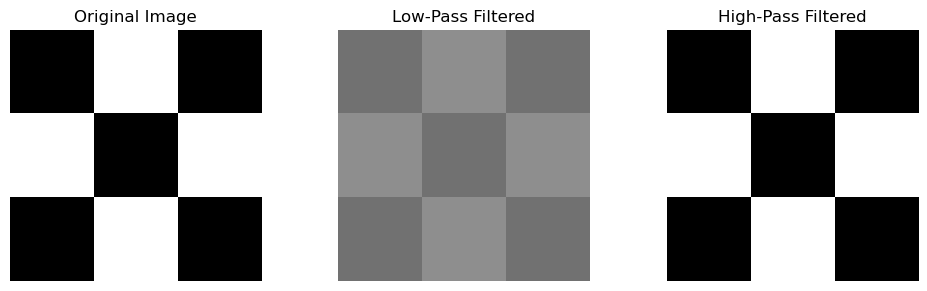

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define a simple 3x3 black-and-white "cube" image
cube_image = np.array([
    [0, 255, 0],
    [255, 0, 255],
    [0, 255, 0]
], dtype=np.uint8)  # 0 represents black, 255 represents white

# Define low-pass filter (mean filter)
low_pass_filter = np.ones((3, 3), dtype=np.float32) / 9.0

# Define high-pass filter (emphasize edges)
high_pass_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Apply low-pass filter
low_pass_image = cv2.filter2D(cube_image, -1, low_pass_filter)

# Apply high-pass filter
high_pass_image = cv2.filter2D(cube_image, -1, high_pass_filter)

# Display the original and filtered images
plt.figure(figsize=(10, 3))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cube_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Low-pass filtered image
plt.subplot(1, 3, 2)
plt.title("Low-Pass Filtered")
plt.imshow(low_pass_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# High-pass filtered image
plt.subplot(1, 3, 3)
plt.title("High-Pass Filtered")
plt.imshow(high_pass_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()


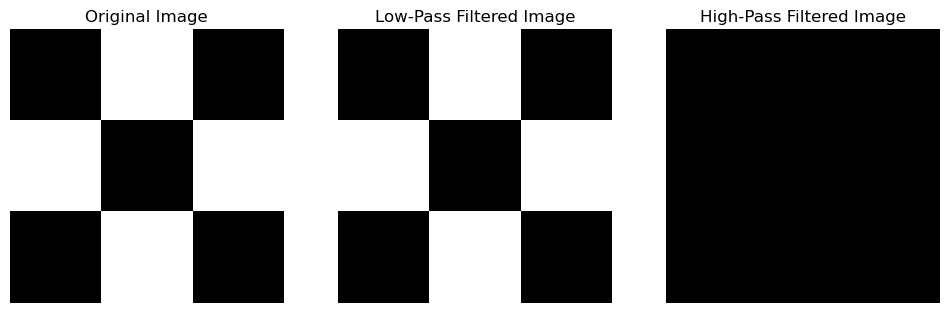

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a grayscale image (or create a simple 3x3 black-and-white image for illustration)
image = np.array([
    [0, 255, 0],
    [255, 0, 255],
    [0, 255, 0]
], dtype=np.uint8)

# Step 1: Convert image to frequency domain using DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center

# Step 2a: Create a low-pass filter mask
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-1:crow+2, ccol-1:ccol+2] = 1  # A small square in the center

# Step 3a: Apply the low-pass mask to the DFT-shifted image
low_pass_filtered = dft_shifted * mask

# Step 4a: Convert back to the spatial domain
low_pass_ishift = np.fft.ifftshift(low_pass_filtered)
img_back_low = cv2.idft(low_pass_ishift)
img_back_low = cv2.magnitude(img_back_low[:, :, 0], img_back_low[:, :, 1])

# Step 2b: Create a high-pass filter mask (invert the low-pass mask)
high_pass_mask = 1 - mask

# Step 3b: Apply the high-pass mask to the DFT-shifted image
high_pass_filtered = dft_shifted * high_pass_mask

# Step 4b: Convert back to the spatial domain
high_pass_ishift = np.fft.ifftshift(high_pass_filtered)
img_back_high = cv2.idft(high_pass_ishift)
img_back_high = cv2.magnitude(img_back_high[:, :, 0], img_back_high[:, :, 1])

# Plot the original and filtered images
plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Low-pass filtered image
plt.subplot(1, 3, 2)
plt.title("Low-Pass Filtered Image")
plt.imshow(img_back_low, cmap='gray')
plt.axis('off')

# High-pass filtered image
plt.subplot(1, 3, 3)
plt.title("High-Pass Filtered Image")
plt.imshow(img_back_high, cmap='gray')
plt.axis('off')

plt.show()


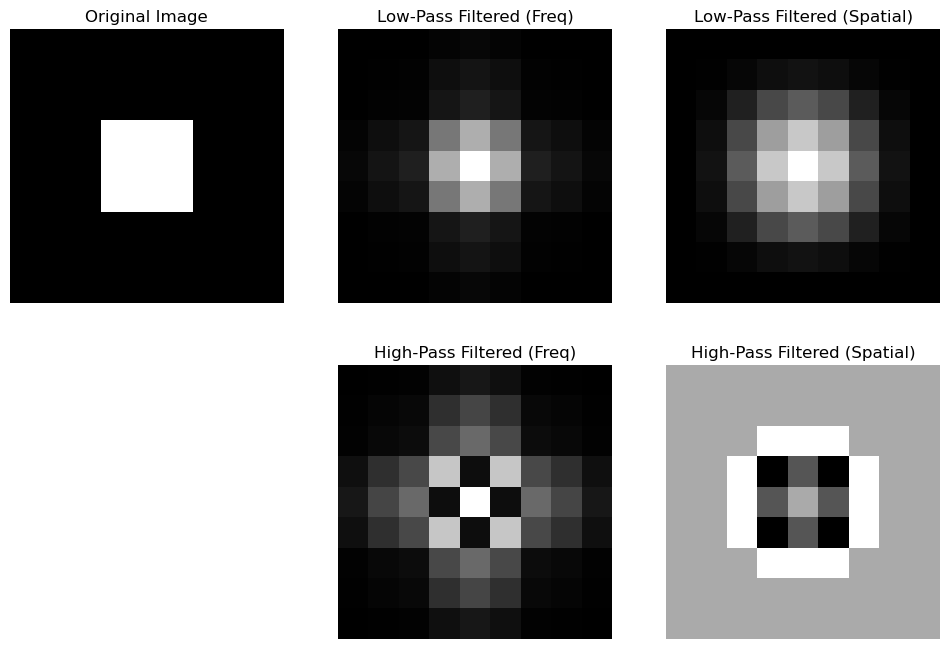

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a larger black-and-white image for a clearer demonstration
image = np.zeros((9, 9), dtype=np.uint8)
image[3:6, 3:6] = 255  # A white square in the center of a black background

# Step 1: Convert image to frequency domain using DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center

# Step 2a: Create a low-pass filter mask
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-2:crow+3, ccol-2:ccol+3] = 1  # Slightly larger square mask in center for smoother results

# Step 3a: Apply the low-pass mask to the DFT-shifted image
low_pass_filtered = dft_shifted * mask

# Step 4a: Convert back to the spatial domain
low_pass_ishift = np.fft.ifftshift(low_pass_filtered)
img_back_low = cv2.idft(low_pass_ishift)
img_back_low = cv2.magnitude(img_back_low[:, :, 0], img_back_low[:, :, 1])

# Spatial Domain Low-Pass Filtering for Comparison
low_pass_spatial = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2b: Create a high-pass filter mask (invert the low-pass mask)
high_pass_mask = 1 - mask

# Step 3b: Apply the high-pass mask to the DFT-shifted image
high_pass_filtered = dft_shifted * high_pass_mask

# Step 4b: Convert back to the spatial domain
high_pass_ishift = np.fft.ifftshift(high_pass_filtered)
img_back_high = cv2.idft(high_pass_ishift)
img_back_high = cv2.magnitude(img_back_high[:, :, 0], img_back_high[:, :, 1])

# Spatial Domain High-Pass Filtering for Comparison
high_pass_spatial = cv2.Laplacian(image, cv2.CV_64F)

# Plot the original and filtered images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Low-pass filtered image (Frequency Domain)
plt.subplot(2, 3, 2)
plt.title("Low-Pass Filtered (Freq)")
plt.imshow(img_back_low, cmap='gray')
plt.axis('off')

# Low-pass filtered image (Spatial Domain)
plt.subplot(2, 3, 3)
plt.title("Low-Pass Filtered (Spatial)")
plt.imshow(low_pass_spatial, cmap='gray')
plt.axis('off')

# High-pass filtered image (Frequency Domain)
plt.subplot(2, 3, 5)
plt.title("High-Pass Filtered (Freq)")
plt.imshow(img_back_high, cmap='gray')
plt.axis('off')

# High-pass filtered image (Spatial Domain)
plt.subplot(2, 3, 6)
plt.title("High-Pass Filtered (Spatial)")
plt.imshow(high_pass_spatial, cmap='gray')
plt.axis('off')

plt.show()
